In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import datetime as dt

In [2]:
df = pd.read_excel('Когортный анализ.xlsx')
df.head()

,user_id,date,price
0,A0005,2020-03-25,50
1,A0005,2020-03-25,40
2,A0005,2020-03-26,70
3,A0005,2020-03-27,20
4,A0005,2020-03-29,50


In [3]:
df.isnull().sum()

user_id    0
date       0
price      0
dtype: int64

In [4]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)


In [5]:
df['month_year']=df['date'].apply(get_month)

In [6]:
def get_date(df, column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day

In [7]:
date_year,date_month,_ = get_date(df, 'date')

In [8]:
date_year

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
704835    2021
704836    2021
704837    2021
704838    2021
704839    2021
Name: date, Length: 704840, dtype: int32

In [9]:
df['cohortMonth'] = df.groupby('user_id')['month_year'].transform('min')

In [10]:
cohort_year,cohort_month,_ = get_date(df, 'cohortMonth')

In [11]:
year_diff=date_year-cohort_year

In [12]:
month_diff=date_month-cohort_month

In [13]:
df['cohort_index']=year_diff*12+month_diff+1

In [14]:
df

,user_id,date,price,month_year,cohortMonth,cohort_index
0,A0005,2020-03-25,50,2020-03-01,2020-03-01,1
1,A0005,2020-03-25,40,2020-03-01,2020-03-01,1
2,A0005,2020-03-26,70,2020-03-01,2020-03-01,1
3,A0005,2020-03-27,20,2020-03-01,2020-03-01,1
4,A0005,2020-03-29,50,2020-03-01,2020-03-01,1
...,...,...,...,...,...,...
704835,Z9247,2021-01-10,20,2021-01-01,2021-01-01,1
704836,Z9247,2021-01-11,50,2021-01-01,2021-01-01,1
704837,Z9247,2021-01-11,70,2021-01-01,2021-01-01,1
704838,Z9247,2021-01-11,20,2021-01-01,2021-01-01,1


In [15]:
data2=df.pivot_table(index='cohortMonth',
                       columns='cohort_index',
                       values='user_id',
                       aggfunc=lambda x:len(x.unique()))
data2

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,1210.0,455.0,264.0,247.0,242.0,207.0,185.0,172.0,165.0,171.0,164.0,159.0,162.0,149.0
2020-02-01,1111.0,440.0,222.0,202.0,201.0,171.0,133.0,123.0,113.0,90.0,94.0,76.0,62.0,NaN
2020-03-01,1545.0,527.0,306.0,290.0,286.0,250.0,223.0,208.0,186.0,187.0,182.0,175.0,NaN,NaN
2020-04-01,1333.0,515.0,238.0,219.0,228.0,186.0,144.0,143.0,136.0,125.0,111.0,NaN,NaN,NaN
2020-05-01,1738.0,581.0,313.0,301.0,302.0,260.0,240.0,235.0,219.0,206.0,NaN,NaN,NaN,NaN
2020-06-01,1480.0,558.0,265.0,247.0,249.0,216.0,186.0,174.0,153.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,1995.0,649.0,332.0,312.0,293.0,256.0,243.0,224.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,1744.0,643.0,285.0,265.0,263.0,227.0,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,2081.0,701.0,336.0,312.0,303.0,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


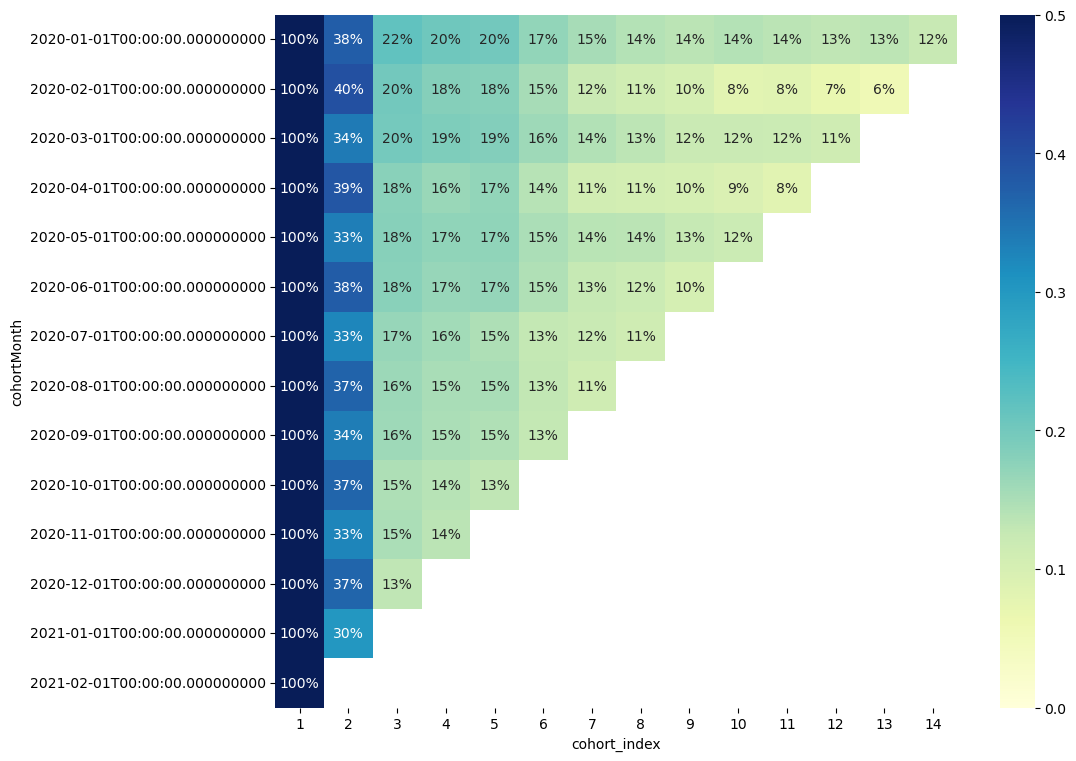

In [16]:
first_column = data2.iloc[:,0]

retention = data2.div(first_column, axis=0)

retention.round(2)

plt.figure(figsize=(11, 9))

sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='YlGnBu')

plt.show()

In [17]:
data1=df.pivot_table(index='cohortMonth',
                       columns='cohort_index',
                       values='price',
                       aggfunc=sum)

data1

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohortMonth,,,,,,,,,,,,,,
2020-01-01,662180.0,642990.0,608410.0,565650.0,547080.0,483840.0,455490.0,412040.0,407790.0,428040.0,382000.0,371740.0,360570.0,79310.0
2020-02-01,536310.0,594210.0,445590.0,450500.0,409640.0,366150.0,300350.0,278920.0,251840.0,212570.0,194800.0,156240.0,31080.0,NaN
2020-03-01,873000.0,797300.0,680220.0,666890.0,646610.0,546210.0,542030.0,486430.0,461720.0,465630.0,447040.0,90390.0,NaN,NaN
2020-04-01,648770.0,667480.0,526090.0,503450.0,482350.0,378620.0,354250.0,332740.0,329710.0,314460.0,61750.0,NaN,NaN,NaN
2020-05-01,992030.0,870090.0,737430.0,740850.0,699940.0,633220.0,584100.0,572410.0,568870.0,115380.0,NaN,NaN,NaN,NaN
2020-06-01,718980.0,759810.0,563430.0,559150.0,545300.0,472750.0,453890.0,411240.0,78310.0,NaN,NaN,NaN,NaN,NaN
2020-07-01,1106840.0,913300.0,739440.0,735260.0,661290.0,634590.0,604380.0,124890.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,844520.0,800350.0,607090.0,586730.0,603010.0,517030.0,94600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,1164460.0,979070.0,784700.0,778600.0,710410.0,140880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


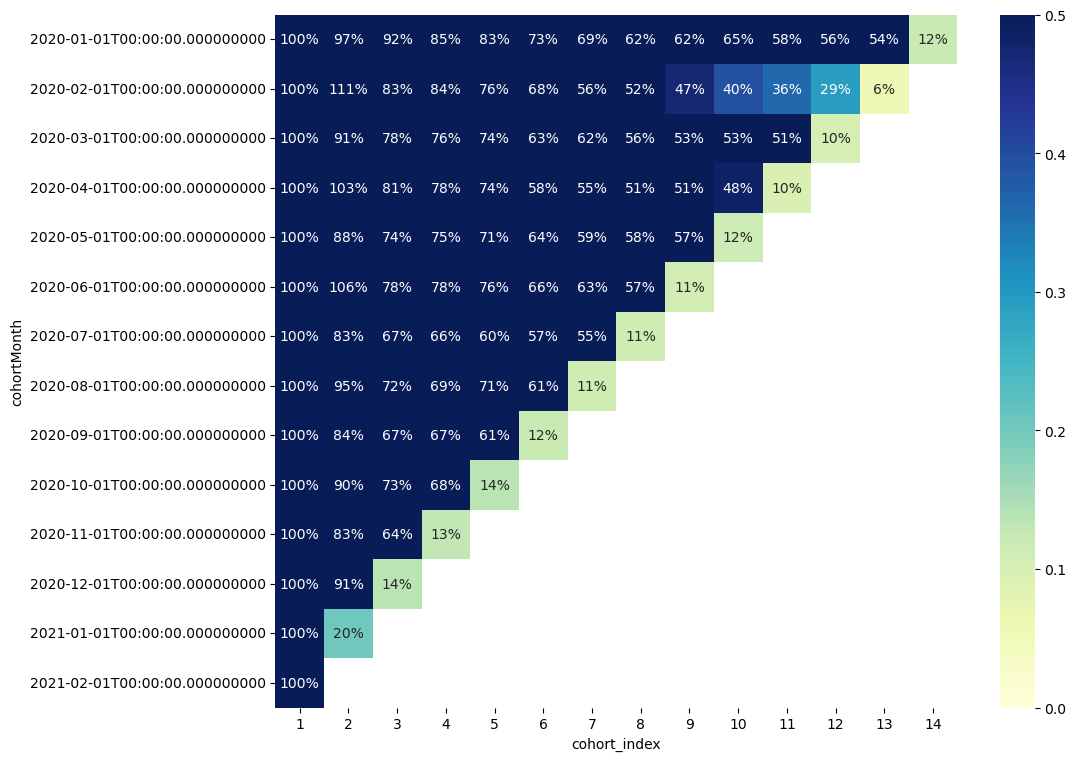

In [18]:
first_column = data1.iloc[:,0]

retention = data1.div(first_column, axis=0)

retention.round(2)

plt.figure(figsize=(11, 9))

sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='YlGnBu')

plt.show()